## Exploratory Data Analysis

# Importasi Library

In [29]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import statistics
import src.util as util

from scipy.stats import ttest_ind# import scipy stats untuk uji statistik
from scipy.stats import t  
import scipy.stats as scs
import yaml
import matplotlib.pyplot as plt

In [30]:
config_data = util.load_config()

In [31]:
params_dir = "config/config.yaml"

In [32]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [33]:
params = load_params(params_dir)

In [34]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_feng_set_path': ['dataset/2 - processed/X_train_feng.pkl',
  'dataset/2 - processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['dataset/2 - processed/X_valid_feng.pkl',
  'dataset/2 - processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['dataset/2 - processed/X_test_feng.pkl',
  'dataset/2 - processed/y_test_feng.pkl'],
 'impute_data_train': ['dataset/2 - processed/X_train_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_test': ['dataset/2 - processed/X_test_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_valid': ['dataset/2 - processed/X_valid_impute.pkl',
  'dataset/2 - processed/y_valid_impute.pkl

# Import Data

Import data dengan format pickle dan akan diload menjadi dataframe sesuai dengan format save sebelumnya

In [35]:
#Import data yang sudah dibuat sebelumnya dari proses data preparation
X_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

In [36]:
#Sanity Check Data
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,768,Germany,Female,43,2,129264.05,2,0,0,19150.14
...,...,...,...,...,...,...,...,...,...,...
9785,455,France,Female,27,5,155879.09,2,0,0,70774.97
7763,614,Spain,Female,36,1,44054.84,1,1,1,73329.08
5218,685,France,Male,20,4,104719.94,2,1,0,38691.34
1346,643,France,Male,30,5,94443.77,1,1,1,165614.40


In [37]:
#Sanity Check Data
y_train

3144    0
9939    0
7925    0
309     0
9415    0
       ..
9785    0
7763    0
5218    0
1346    0
3582    0
Name: Exited, Length: 7000, dtype: int64

## Menggabungkan Data untuk dijadikan Set EDA

In [38]:
#Menggabungkan x train dan y train untuk keperluan EDA
data_bank = pd.merge(X_train, y_train, left_index=True, right_index=True)
#Sanity Check Data
data_bank

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3144,648,Spain,Male,55,1,81370.07,1,0,1,181534.04,0
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77,0
7925,586,Spain,Female,33,7,0.00,2,1,1,168261.40,0
309,438,Germany,Male,31,8,78398.69,1,1,0,44937.01,0
9415,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...
9785,455,France,Female,27,5,155879.09,2,0,0,70774.97,0
7763,614,Spain,Female,36,1,44054.84,1,1,1,73329.08,0
5218,685,France,Male,20,4,104719.94,2,1,0,38691.34,0
1346,643,France,Male,30,5,94443.77,1,1,1,165614.40,0


## Cek Missing Value

In [39]:
data_bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Cek Informasi Statistic

In [40]:
# cek skewness
data_bank[["CreditScore","Age","Balance","EstimatedSalary"]].skew()

CreditScore       -0.074221
Age                1.026685
Balance           -0.133060
EstimatedSalary    0.011646
dtype: float64

In [41]:
# cek skewness
data_bank.skew(numeric_only = True)

CreditScore       -0.074221
Age                1.026685
Tenure             0.004521
Balance           -0.133060
NumOfProducts      0.740823
HasCrCard         -0.901492
IsActiveMember    -0.061185
EstimatedSalary    0.011646
Exited             1.465050
dtype: float64

Rules :

-   jika kolom mendapati skewnya sebesar > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
-   jika kolom mendapati skewnya sebesar <= +- 0.5 kolom lainnya akan diimputasi dengan mean

Imputasi Median :

-   Age

Imputasi Mean :

-   CreditScore
-   Balance
-   EstimatedSalary


## Pemisahan Data berdasarkan kelas

In [13]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_stay = data_bank[data_bank.Exited == 0].copy()
dataset_churn = data_bank[data_bank.Exited != 0].copy()

In [14]:
# kelas 0
dataset_stay.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5568.0
mean,651.680855,37.438578,5.040230,72517.015781,1.546695,0.704023,0.552443,99684.100656,0.0
std,95.398631,10.249895,2.884365,63252.462188,0.511386,0.456522,0.497287,57502.963501,0.0
min,410.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,96.270000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50397.985000,0.0
50%,654.000000,36.000000,5.000000,91158.095000,2.000000,1.000000,1.000000,99467.015000,0.0
75%,717.000000,41.000000,7.000000,126742.780000,2.000000,1.000000,1.000000,148709.117500,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [15]:
# kelas 1
dataset_churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.00000,1432.000000,1432.0
mean,644.171089,44.790503,4.942039,91735.113115,1.486732,0.710894,0.37081,100906.781906,1.0
std,100.736856,9.954795,2.933956,58050.857520,0.800833,0.453506,0.48319,57769.015753,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.00000,11.580000,1.0
25%,576.750000,38.000000,2.000000,46159.190000,1.000000,0.000000,0.00000,51795.457500,1.0
50%,645.000000,45.000000,5.000000,109838.185000,1.000000,1.000000,0.00000,101270.510000,1.0
75%,715.250000,51.000000,8.000000,131589.512500,2.000000,1.000000,1.00000,152548.355000,1.0
max,850.000000,84.000000,10.000000,238387.560000,4.000000,1.000000,1.00000,199808.100000,1.0


Imputasi untuk data kategorikal ialah menggunakan modus Imputasi untuk data numerikal ialah median dan mean tergantung skewed yang sudah dijelaskan diatas karena masing-masing memiliki kelas 0 dan 1 tidak terpaut jauh dan tidak menggunakan kelas.

## Melihat Distribusi Data

### Plot distribusi jika tidak dibedakan berdasarkan Exited dan Stay

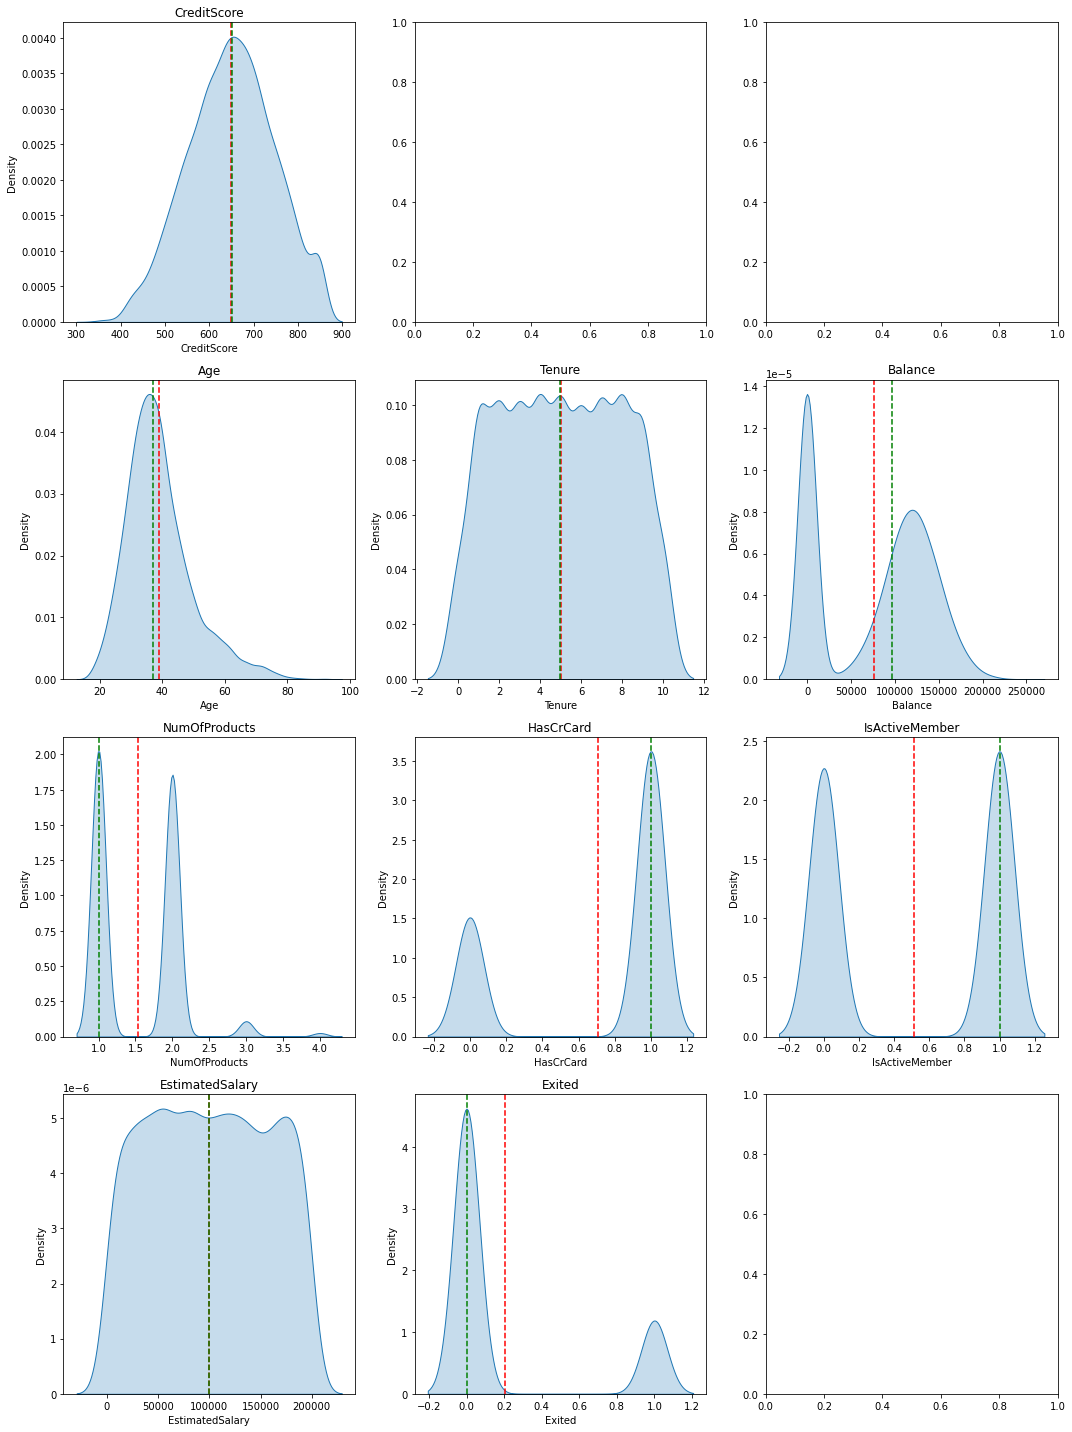

In [21]:
import matplotlib.pyplot as plt

# menghitung jumlah baris dan kolom untuk subplots
n_rows = (len(data_bank.columns) - 1) // 3 + 1
n_cols = min(len(data_bank.columns), 3)

# membuat subplots dengan ukuran 15x5 inci
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# looping untuk melakukan visualisasi distribusi data setiap kolom menggunakan kdeplot dengan central tendency didalamnya
for i, col in enumerate(data_bank.columns):
    if data_bank[col].dtype != 'object':
        sns.kdeplot(data_bank[col], shade=True, ax=axes[i // n_cols, i % n_cols])
        axes[i // n_cols, i % n_cols].axvline(data_bank[col].mean(), color='red', linestyle='--')
        axes[i // n_cols, i % n_cols].axvline(data_bank[col].median(), color='green', linestyle='--')
        axes[i // n_cols, i % n_cols].set_title(col)

# mengatur layout dan jarak antar subplots
plt.tight_layout()

# menyimpan hasil visualisasi ke dalam file
plt.savefig('plot_distibusi_data.png')

## Balance Dist - Category Stay dan Exited

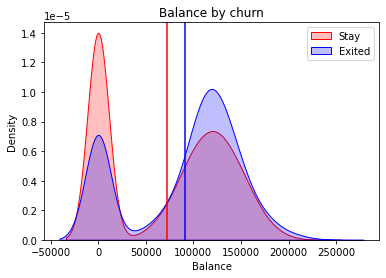

In [51]:
Balance_dist = sns.kdeplot(data_bank.Balance[(data_bank["Exited"] == 0) ],
                           color="Red", shade = True)
Balance_dist = sns.kdeplot(data_bank.Balance[(data_bank["Exited"] == 1) ],
                           ax=Balance_dist, color="Blue", shade= True)

Balance_dist.legend(["Stay","Exited"],loc='upper right')
Balance_dist.set_ylabel('Density')
Balance_dist.set_xlabel('Balance')
Balance_dist.set_title('Balance by churn')
plt.axvline(dataset_stay.Balance.mean(), 0, 1, color = "r")
plt.axvline(dataset_churn.Balance.mean(), 0, 1, color = "b")
plt.show()

## EstimatedSalary Dist - Category Stay dan Exited

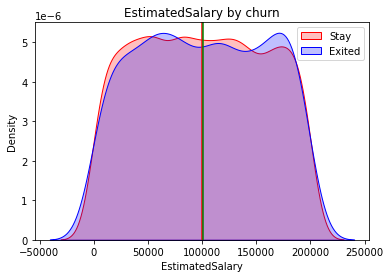

In [52]:
EstimatedSalary = sns.kdeplot(data_bank.EstimatedSalary[(data_bank["Exited"] == 0) ],
                  color="Red", shade = True)
EstimatedSalary = sns.kdeplot(data_bank.EstimatedSalary[(data_bank["Exited"] == 1) ],
                  ax=EstimatedSalary, color="Blue", shade= True)

EstimatedSalary.legend(["Stay","Exited"],loc='upper right')
EstimatedSalary.set_ylabel('Density')
EstimatedSalary.set_xlabel('EstimatedSalary')
EstimatedSalary.set_title('EstimatedSalary by churn')
plt.axvline(dataset_stay.EstimatedSalary.mean(), 0, 1, color = "r")
plt.axvline(dataset_churn.EstimatedSalary.mean(), 0, 1, color = "g")
plt.show()

## CreditScore Dist - Category Stay dan Exited

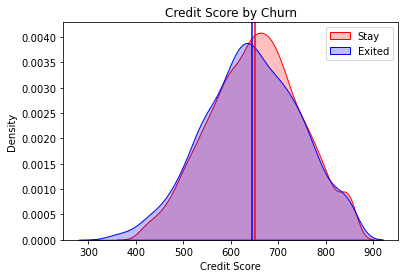

In [53]:
CreditScore = sns.kdeplot(data_bank.CreditScore[(data_bank["Exited"] == 0) ],
                  color="Red", shade = True)
CreditScore = sns.kdeplot(data_bank.CreditScore[(data_bank["Exited"] == 1) ],
                  ax=CreditScore, color="Blue", shade= True)

CreditScore.legend(["Stay","Exited"],loc='upper right')
CreditScore.set_ylabel('Density')
CreditScore.set_xlabel('Credit Score')
CreditScore.set_title('Credit Score by Churn')
plt.axvline(dataset_stay.CreditScore.mean(), 0, 1, color = "r")
plt.axvline(dataset_churn.CreditScore.mean(), 0, 1, color = "b")
plt.show()

## Age Dist - Category Stay dan Exited

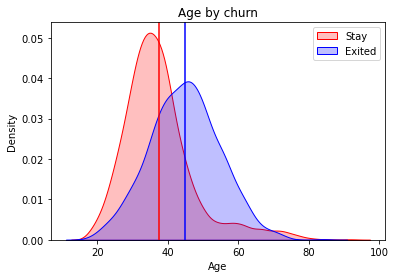

In [54]:
Age = sns.kdeplot(data_bank.Age[(data_bank["Exited"] == 0) ],
                  color="Red", shade = True)
Age = sns.kdeplot(data_bank.Age[(data_bank["Exited"] == 1) ],
                  ax=Age, color="Blue", shade= True)

Age.legend(["Stay","Exited"],loc='upper right')
Age.set_ylabel('Density')
Age.set_xlabel('Age')
Age.set_title('Age by churn')
plt.axvline(dataset_stay.Age.mean(), 0, 1, color = "r")
plt.axvline(dataset_churn.Age.mean(), 0, 1, color = "b")
plt.show()

## Tenure Dist - Category Stay dan Exited

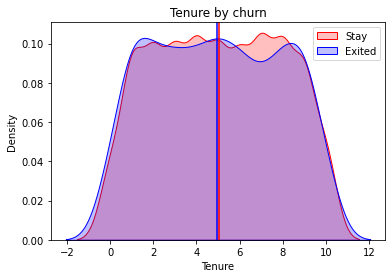

In [55]:
Tenure = sns.kdeplot(data_bank.Tenure[(data_bank["Exited"] == 0) ],
                     color="Red", shade = True)
Tenure = sns.kdeplot(data_bank.Tenure[(data_bank["Exited"] == 1) ],
                     ax=Tenure, color="Blue", shade= True)

Tenure.legend(["Stay","Exited"],loc='upper right')
Tenure.set_ylabel('Density')
Tenure.set_xlabel('Tenure')
Tenure.set_title('Tenure by churn')
plt.axvline(dataset_stay.Tenure.mean(), 0, 1, color = "r")
plt.axvline(dataset_churn.Tenure.mean(), 0, 1, color = "b")
plt.show()

## Hisplot keseluruhan kolom

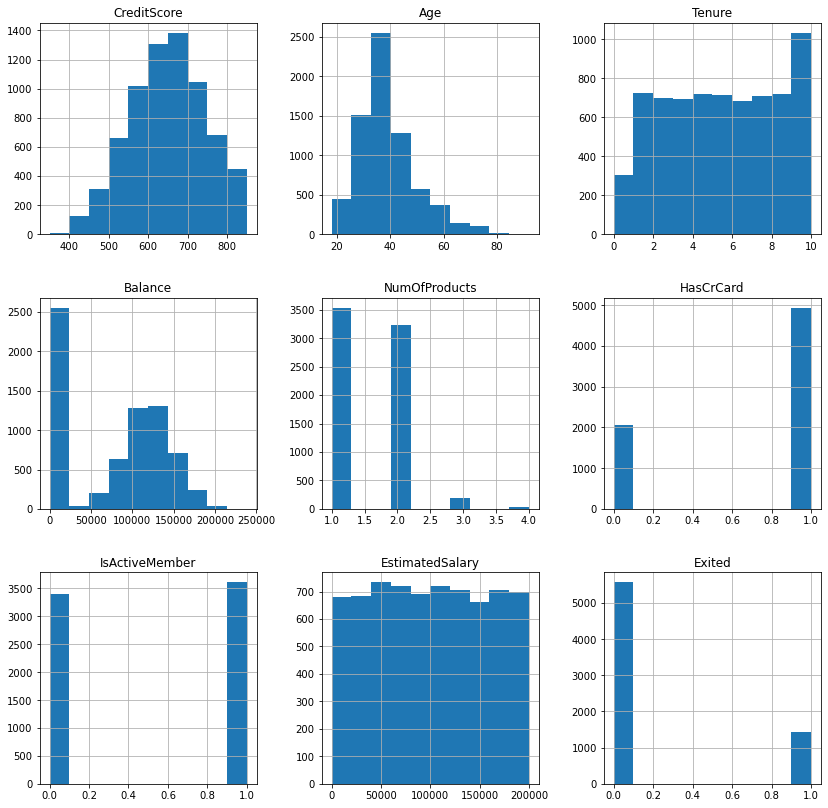

In [56]:
data_bank.hist(figsize=(14,14))
plt.show()

## Komparasi dan Proporsi data

### Komparasi antar User Stay dan User Exited

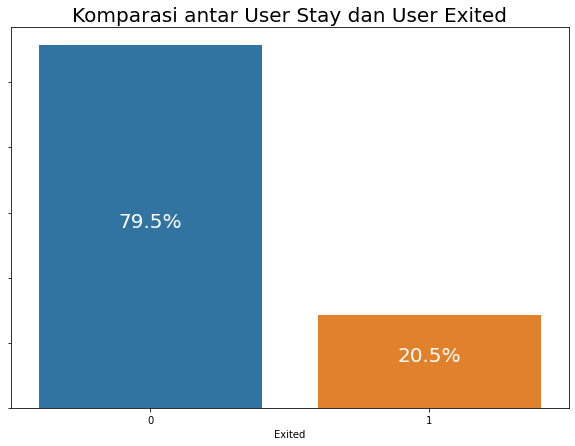

In [23]:
#prepare the data
exited_proportion = data_bank.groupby("Exited")["Age"].count().reset_index()
exited_proportion.rename(columns = {"Age":"count"}, inplace=True)

# create figure and axes
fig, ax = plt.subplots(figsize=(10,7))

# create the plot
sns.barplot(data=exited_proportion, x="Exited", y="count")
ax.set(yticklabels=[])  
ax.set(ylabel=None)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/sum(exited_proportion["count"]))
    x = i.get_x() + i.get_width()/2
    y = i.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', fontsize=20, color="white")
ax.set_title("Komparasi antar User Stay dan User Exited", fontsize=20)

# save the plot
plt.savefig('Komparasi_stay_exited.png')
# show the plot
plt.show()

In [58]:
# Value Count dari Exited
data_bank.Exited.value_counts()

0    5568
1    1432
Name: Exited, dtype: int64

## Proporsi Stay dan Exited Perempuan

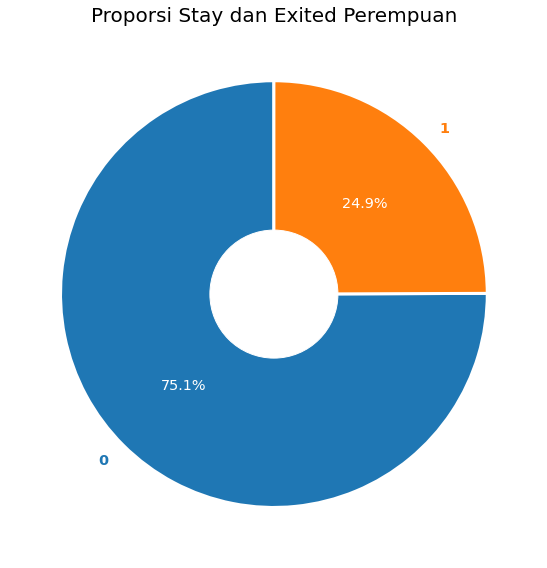

In [59]:
#Mempersiapkan data region dan count user
perempuan_exited = data_bank[data_bank["Gender"] == "Female"]
proporsi_perempuan_exited = perempuan_exited.groupby("Exited")['Gender'].count().reset_index()
proporsi_perempuan_exited.rename(columns={'Gender':'count'}, inplace=True)

exited_user = proporsi_perempuan_exited["Exited"]
count_exited_user = proporsi_perempuan_exited["count"]

#Melakukan visualisasi data dengan menggunakan doughnut chart
fig, ax = plt.subplots(figsize=(10, 8))

patches, texts, pcts = ax.pie(
    count_exited_user, labels=exited_user, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Proporsi Stay dan Exited Perempuan', fontsize=20)
plt.tight_layout()

## Proporsi Stay dan Exited Laki-laki

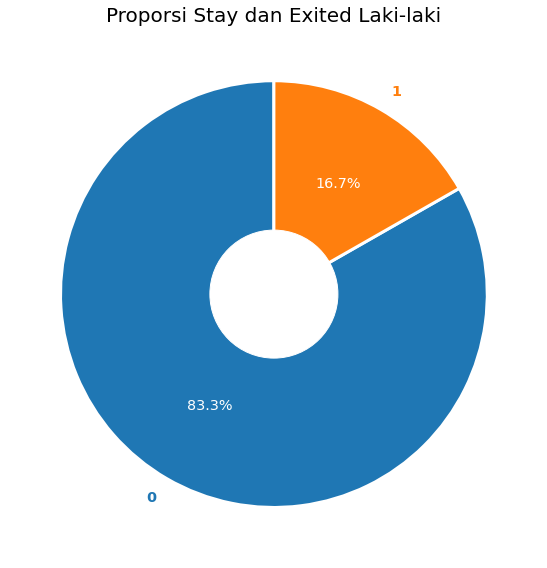

In [60]:
#Mempersiapkan data region dan count user
perempuan_exited = data_bank[data_bank["Gender"] == "Male"]
proporsi_laki_exited = perempuan_exited.groupby("Exited")['Gender'].count().reset_index()
proporsi_laki_exited.rename(columns={'Gender':'count'}, inplace=True)

exited_user = proporsi_laki_exited["Exited"]
count_exited_user = proporsi_laki_exited["count"]

#Melakukan visualisasi data dengan menggunakan doughnut chart
fig, ax = plt.subplots(figsize=(10, 8))

patches, texts, pcts = ax.pie(
    count_exited_user, labels=exited_user, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Proporsi Stay dan Exited Laki-laki', fontsize=20)
plt.tight_layout()

## Count dan Persentase geography user Stay dan Exited

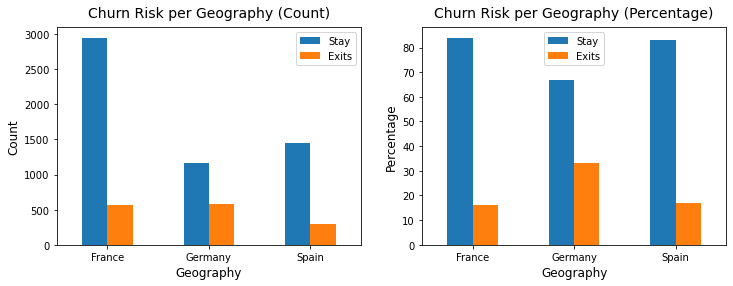

In [61]:
# Segment "Exited" by geography and display the frequency and percentage within each class
grouped = data_bank.groupby('Geography')['Exited'].agg(Count='value_counts')

# Reorganize dataframe for plotting count
dfgeoc = grouped
dfgeoc = dfgeoc.pivot_table(values='Count', index='Geography', columns=['Exited'])

# Calculate percentage within each class
dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count': 'Percentage'}, inplace=True)

# Reorganize dataframe for plotting percentage
dfgeop = dfgeop.pivot_table(values='Percentage', index='Geography', columns=['Exited'])
dfgeop

# Churn distribution by geography, count + percentage
labels= ['Stay', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgeoc.plot(kind='bar',
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)


dfgeop.plot(kind='bar',
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)

plt.show()

## Count dan Persentase Gender user Stay dan Exited

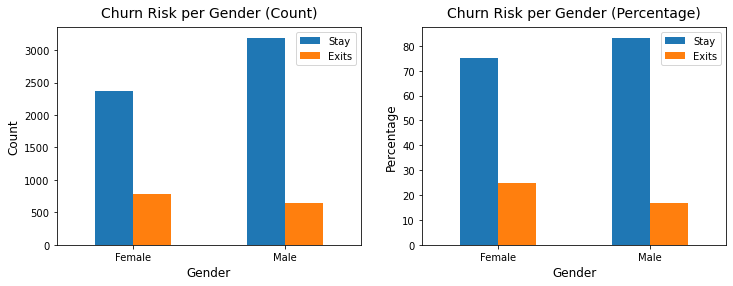

In [62]:
# Segment "Exited" by gender and display the frequency and percentage within each class
grouped = data_bank.groupby('Gender')['Exited'].agg(Count='value_counts')

# Reorganize dataframe for plotting count
dfgc = grouped
dfgc = dfgc.pivot_table(values='Count', index='Gender', columns=['Exited'])

# Calculate percentage within each class
dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)

# Reorganize dataframe for plotting percentage
dfgp = dfgp.pivot_table(values='Percentage', index='Gender', columns=['Exited'])

# Churn distribution by gender, count + percentage

labels= ['Stay', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgc.plot(kind='bar',
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)


dfgp.plot(kind='bar',
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)

plt.show()

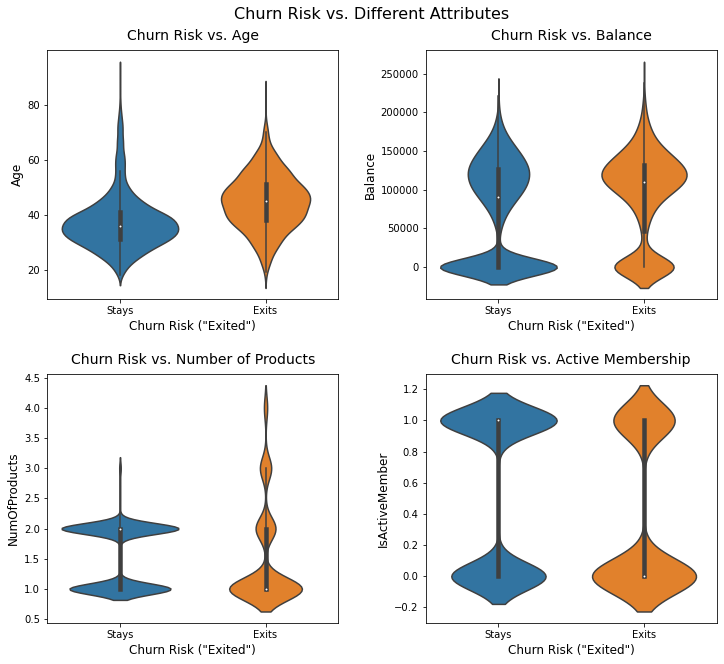

In [63]:
# Define palette
my_pal = {'Stays': 'green', 'Exits': 'red'}
# Convert to categorical
hr = {0: 'Stays', 1: 'Exits'}
churn = data_bank['Exited'].map(hr)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Churn Risk vs. Different Attributes', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.violinplot(x=churn,
               y=data_bank['Age'],
               order=['Stays', 'Exits'], 
               ax=ax1)

ax1.set_title('Churn Risk vs. Age', fontsize=14, pad=10)
ax1.set_ylabel('Age',size=12)
ax1.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=data_bank['Balance'],
               order=['Stays', 'Exits'], 
               ax=ax2)

ax2.set_title('Churn Risk vs. Balance', fontsize=14, pad=10)
ax2.set_ylabel('Balance',size=12)
ax2.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=data_bank['NumOfProducts'],
               order=['Stays', 'Exits'], 
               ax=ax3)

ax3.set_title('Churn Risk vs. Number of Products', fontsize=14, pad=10)
ax3.set_ylabel('NumOfProducts',size=12)
ax3.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=data_bank['IsActiveMember'],
               order=['Stays', 'Exits'], 
               ax=ax4)

ax4.set_title('Churn Risk vs. Active Membership', fontsize=14, pad=10)
ax4.set_ylabel('IsActiveMember',size=12)
ax4.set_xlabel('Churn Risk ("Exited")', size=12)
plt.show()

## Cek Korelasi

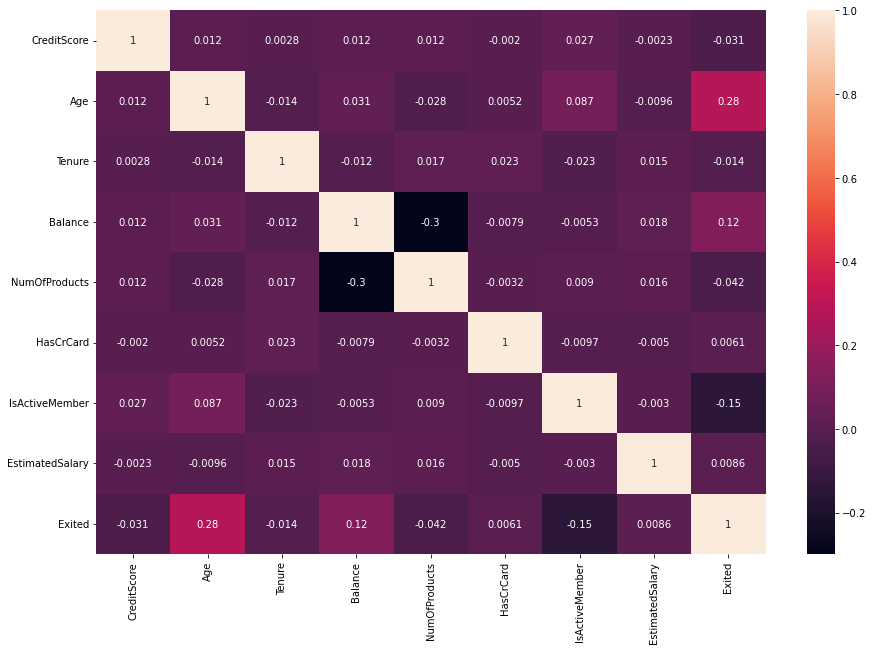

In [24]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(data_bank.corr(method='pearson', min_periods=1),annot=True)
# save the plot
plt.savefig('corelation.png')
plt.show()

## Uji Hipotesis

### CreditScore Exited lebih besar dibanding Stay

The hypothesis that we will test is
$$H_0: \mu_{CreditScore|Exited} <= \mu_{CreditScore|Stay}$$
$$H_1: \mu_{CreditScore|Exited} > \mu_{CreditScore|Stay}$$

In [65]:
stay_credit = data_bank[data_bank['Exited']==0]["CreditScore"]
exited_credit = data_bank[data_bank['Exited']==1]["CreditScore"]

nilai_alpha=0.05

stat, p_value = ttest_ind(a = exited_credit, b = stay_credit, equal_var=False, alternative='greater')

print('Statistics = %.4f, p-value = %.4f' % (stat, p_value))

if p_value < nilai_alpha:
    print('Maka dapat disimpulkan bahwa, Tolak Ho CreditScore Exited lebih besar daripada CreditScore Stay ') 
else:
    print('Maka dapat disimpulkan bahwa, Gagal tolak Ho, tidak cukup bukti bahwa CreditScore Exited lebih besar daripada Tagihan CreditScore Stay')

Statistics = -2.5430, p-value = 0.9945
Maka dapat disimpulkan bahwa, Gagal tolak Ho, tidak cukup bukti bahwa CreditScore Exited lebih besar daripada Tagihan CreditScore Stay


### Balance Exited lebih besar dibanding Stay

The hypothesis that we will test is
$$H_0: \mu_{Balance|Exited} <= \mu_{Balance|Stay}$$
$$H_1: \mu_{Balance|Exited} > \mu_{Balance|Stay}$$

In [66]:
balanced_stay = data_bank[data_bank['Exited']==0]["Balance"]
balanced_exited = data_bank[data_bank['Exited']==1]["Balance"]

nilai_alpha=0.05

stat, p_value = ttest_ind(a = balanced_exited, b = balanced_stay, equal_var=False, alternative='greater')

print('Statistics = %.4f, p-value = %.4f' % (stat, p_value))

if p_value < nilai_alpha:
    print('Maka dapat disimpulkan bahwa, Tolak Ho Balanced Exited lebih besar daripada Balanced Stay') 
else:
    print('Maka dapat disimpulkan bahwa, Gagal tolak Ho, tidak cukup bukti bahwa Balanced Exited lebih besar daripada Balanced Stay')


Statistics = 10.9651, p-value = 0.0000
Maka dapat disimpulkan bahwa, Tolak Ho Balanced Exited lebih besar daripada Balanced Stay


## Outlier Detection 

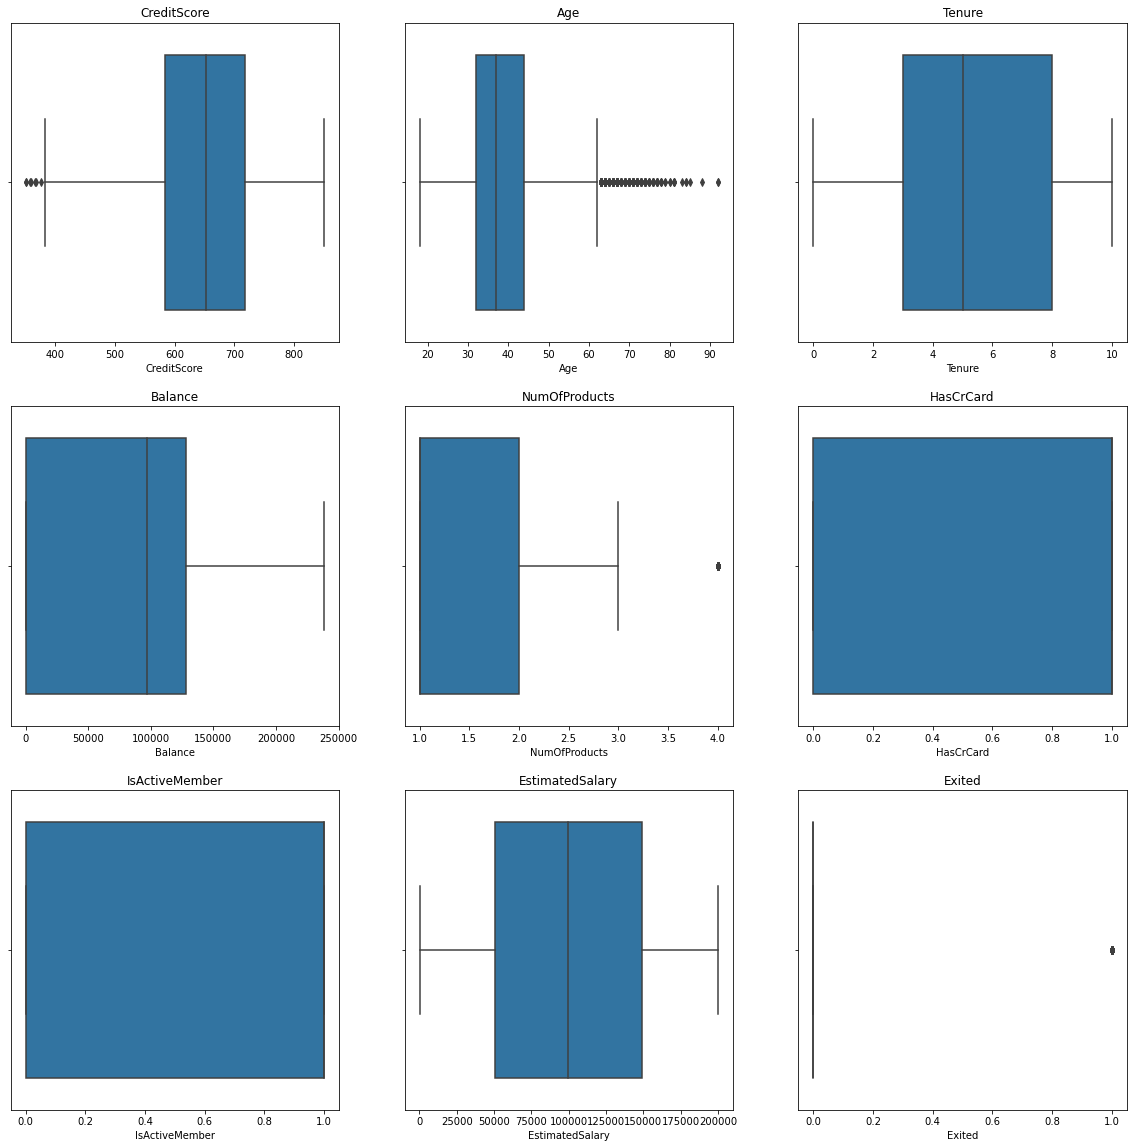

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# tentukan jumlah baris dan kolom subplots yang akan digunakan
num_rows = 3
num_cols = 3

# buat figure dan axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# buat list kolom yang ingin divisualisasikan
cols = [col for col in data_bank.columns if data_bank[col].dtype != 'object']

# looping untuk setiap kolom dan ubah indeksnya menjadi baris dan kolom
for i, col in enumerate(cols):
    row_index, col_index = np.unravel_index(i, (num_rows, num_cols))
    ax = axes[row_index, col_index]
    sns.boxplot(x=data_bank[col], ax=ax)
    ax.set_title(col)
    
# menyimpan figure menjadi file gambar
plt.savefig('oulier_detection.png')

## Kesimpulan

1. Data yang tidak diperuntukan untuk pemodelan dan eda akan  langsung di drop pada data preparation yakni kolom "RowNumber","CustomerId","Surname".

2. Skewed pada data numerical menyatakan bahwa untuk kolom Age akan dilakukan imputasi dengan metode median dan untuk kolom CreditScore, Balance, EstimatedSalary menggunakan metode mean dan data kategorikal diputuskan untuk menggunakan modus untuk metode imputasinya dan tidak menggunakan kelas

3. Distribusi Data kategorikal, CreditScore memiliki data dalam bentuk normal distribution, Age memiliki data dalam bentuk right skewed distribution, EstimatedSalary memilikii data dalam bentuk uniform distribution, Balance memiliki data dalam bentuk bimodal distribution.

4. Data Imbalance, maka perlu dilakukan balancing data untuk menyeimbangkan label target.

5. Outlier Detection, memang terdapat titik yang menggambarkan oulier, namun data tersebut dirasa normal terjadi.
